In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
train.SalePrice.describe()import matplotlib.pyplot as plt
plt.style.use(style = 'ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


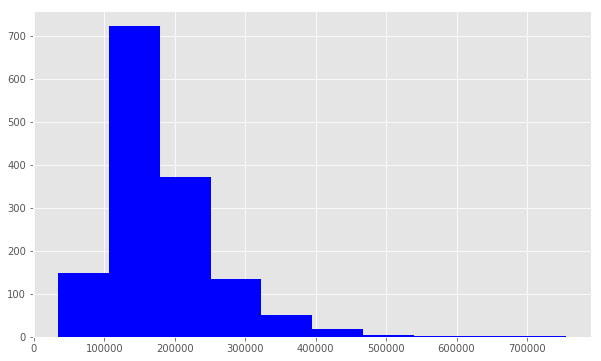

In [7]:
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

## sometimes, log transform the target variable when it is skewed
# 이유1: improve the linearity of the data https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29


Skew is: 0.121335062205


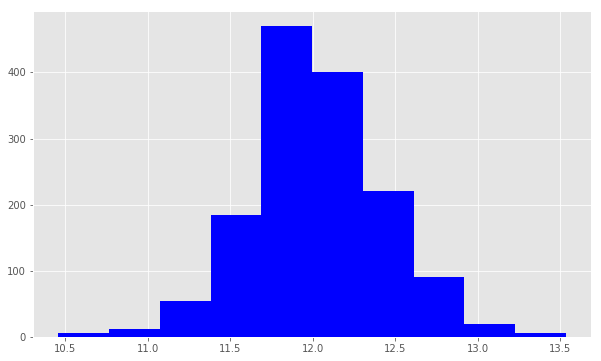

In [8]:
target = np.log(train.SalePrice)
print("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

#? skew 가 0인 것이 이상적? 

### numeric features

In [9]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [10]:
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### overall quality 전체적 집 상태

In [11]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [12]:
quality_pivot = train.pivot_table(index='OverallQual', values= 'SalePrice', aggfunc=np.mean)
quality_pivot
# the higher the overall qual the higher the price is 

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


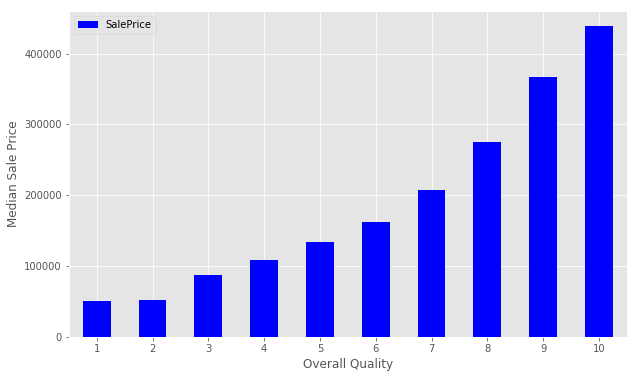

In [13]:
quality_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [14]:
train.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1])

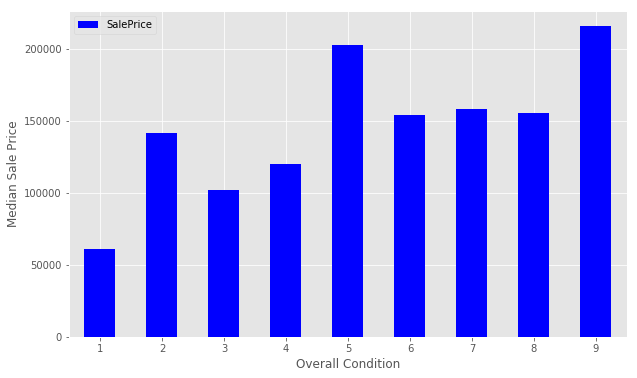

In [29]:
condition_pivot = train.pivot_table(index='OverallCond', values= 'SalePrice', aggfunc=np.mean)
condition_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Overall Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### year built 지어진 년도

In [15]:
train.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

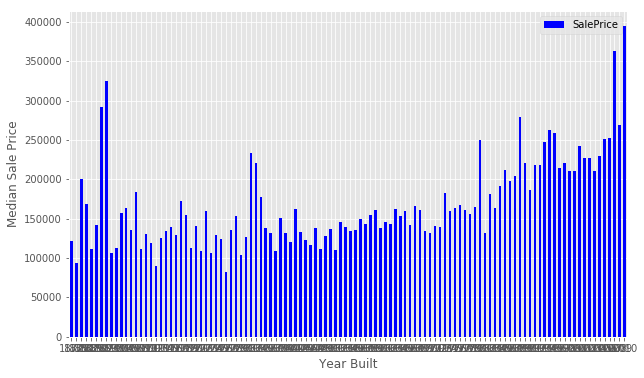

In [34]:
yearbuilt_pivot = train.pivot_table(index='YearBuilt', values= 'SalePrice', aggfunc=np.mean)
yearbuilt_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Year Built')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### month sold 팔린 달 

In [16]:
train.MoSold.unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

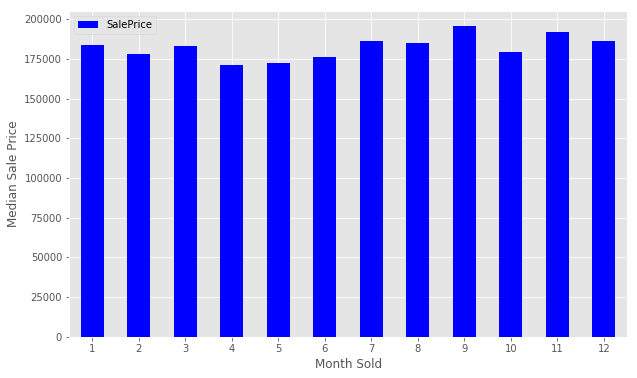

In [35]:
msold_pivot = train.pivot_table(index='MoSold', values= 'SalePrice', aggfunc=np.mean)
msold_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Month Sold')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### garage cars 차고 차량 수용가능수 

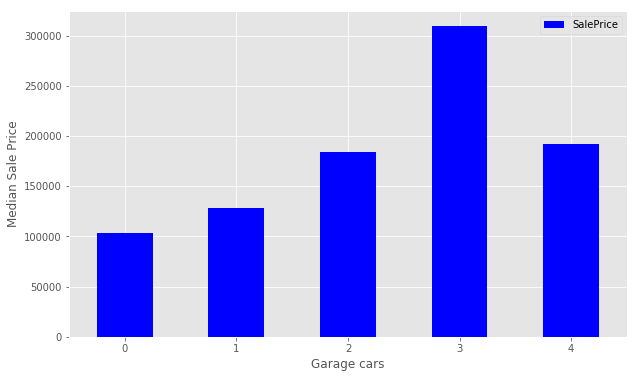

In [19]:
train.GarageCars.unique()
garagecar_pivot = train.pivot_table(index = 'GarageCars', values = 'SalePrice', aggfunc=np.mean)
garagecar_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Garage cars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
# 4대 차량이 수용가능한 집이 3대 보다 집값이 싸다. 아웃라이어로 보임 (밑에 방 갯수과 일관된 현상, 같은 집인듯 )

### Full bath 욕실수 

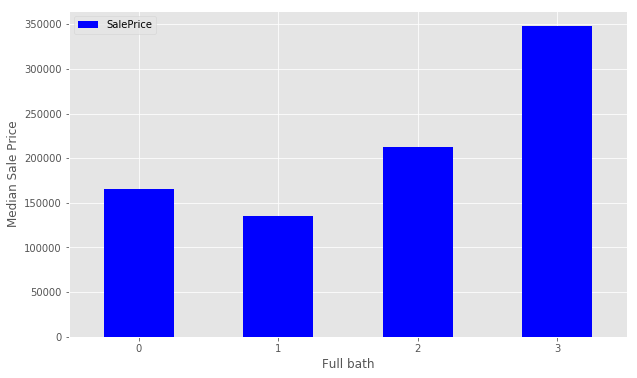

In [20]:
train.FullBath.unique()
FullBath_pivot = train.pivot_table(index = 'FullBath', values = 'SalePrice', aggfunc=np.mean)
FullBath_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Full bath')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
# full bath가 하나도 없는 집이 한개 있는 집보다 비쌈... 차고없는 집이랑 일관된 현상? 

### Total Room number above Grade 전체 방 갯수 (지하 제외) 

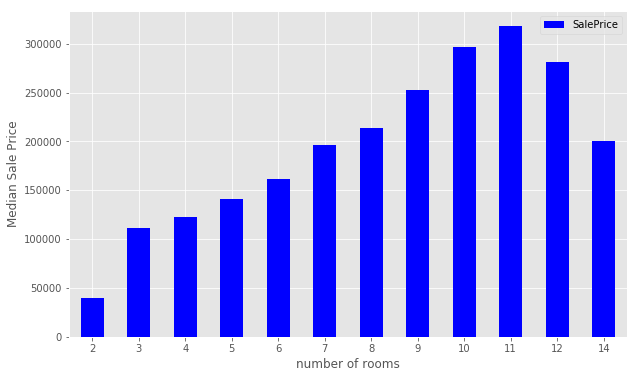

In [21]:
train.TotRmsAbvGrd.unique()
rooms_pivot = train.pivot_table(index = 'TotRmsAbvGrd', values = 'SalePrice', aggfunc=np.mean)
rooms_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of rooms')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
# 방의 개수가 12~14개인 집이 오히려 가격이 낮음 아웃라이어? 

### Number of Fireplaces 벽난로 갯수

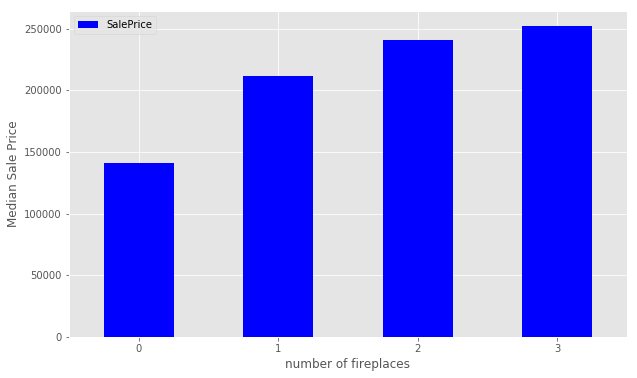

In [23]:
train.Fireplaces.unique()
fireplace_pivot = train.pivot_table(index = 'Fireplaces', values = 'SalePrice', aggfunc=np.mean)
fireplace_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of fireplaces')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### Number of Half Bathrooms 욕실이나 샤워실 없는 화장실(변기와 세면대만있는) 갯수 

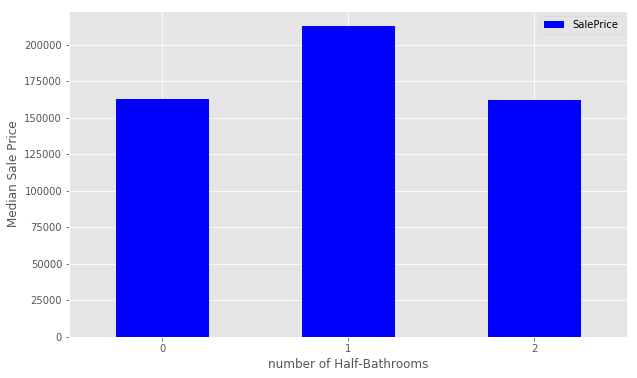

In [24]:
train.HalfBath.unique()
HalfBath_pivot = train.pivot_table(index = 'HalfBath', values = 'SalePrice', aggfunc=np.mean)
HalfBath_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of Half-Bathrooms')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### Year of remodelling 리모델링한 년도

In [25]:
train.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974])

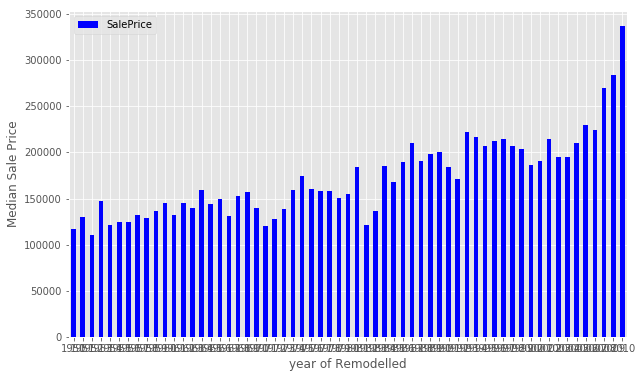

In [26]:
Remodyear_pivot = train.pivot_table(index = 'YearRemodAdd', values = 'SalePrice', aggfunc=np.mean)
Remodyear_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('year of Remodelled')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

### Garage Year built 차고 지어진 년도 

In [27]:
train.GarageYrBlt.unique()

array([ 2003.,  1976.,  2001.,  1998.,  2000.,  1993.,  2004.,  1973.,
        1931.,  1939.,  1965.,  2005.,  1962.,  2006.,  1960.,  1991.,
        1970.,  1967.,  1958.,  1930.,  2002.,  1968.,  2007.,  2008.,
        1957.,  1920.,  1966.,  1959.,  1995.,  1954.,  1953.,    nan,
        1983.,  1977.,  1997.,  1985.,  1963.,  1981.,  1964.,  1999.,
        1935.,  1990.,  1945.,  1987.,  1989.,  1915.,  1956.,  1948.,
        1974.,  2009.,  1950.,  1961.,  1921.,  1900.,  1979.,  1951.,
        1969.,  1936.,  1975.,  1971.,  1923.,  1984.,  1926.,  1955.,
        1986.,  1988.,  1916.,  1932.,  1972.,  1918.,  1980.,  1924.,
        1996.,  1940.,  1949.,  1994.,  1910.,  1978.,  1982.,  1992.,
        1925.,  1941.,  2010.,  1927.,  1947.,  1937.,  1942.,  1938.,
        1952.,  1928.,  1922.,  1934.,  1906.,  1914.,  1946.,  1908.,
        1929.,  1933.])

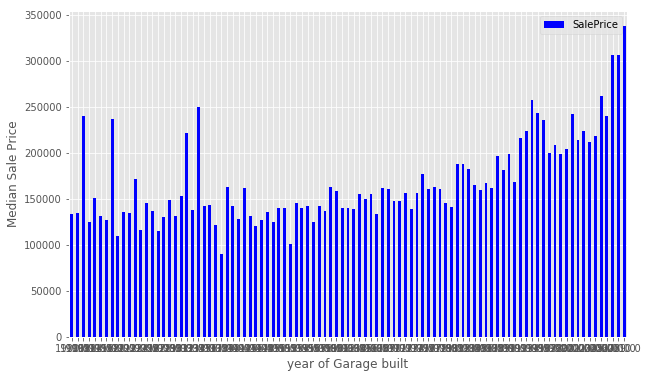

In [28]:
Garageyear_pivot = train.pivot_table(index = 'GarageYrBlt', values = 'SalePrice', aggfunc=np.mean)
Garageyear_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('year of Garage built')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
## 집이 지어진 년도와 비슷하게 오래전에 지어지고 차고도 오래전에 지어졌는데 비슷한 조건 집보다 가격이 높은 경우가 있다. 

In [ ]:
BsmtFullBath

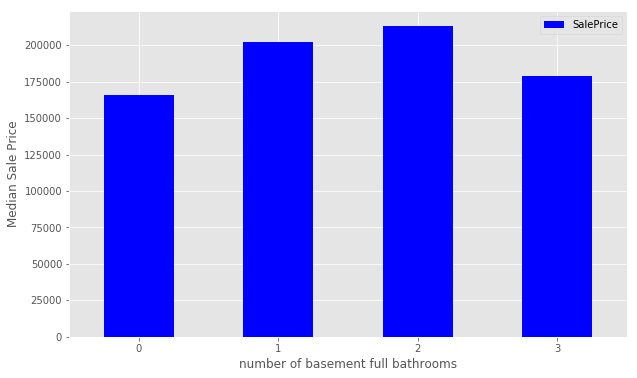

In [29]:
basefullbath_pivot = train.pivot_table(index = 'BsmtFullBath', values = 'SalePrice', aggfunc=np.mean)
basefullbath_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of basement full bathrooms')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
BedroomAbvGr

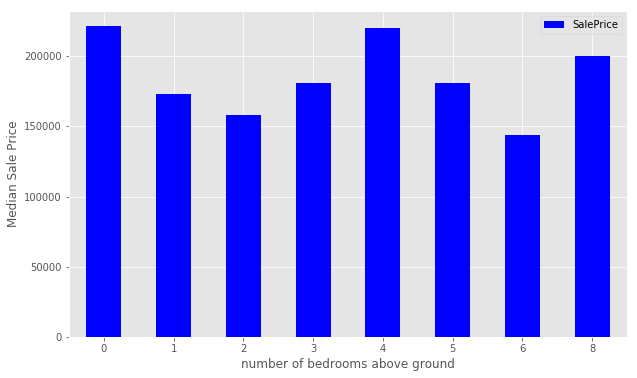

In [30]:
bedroomgr_pivot = train.pivot_table(index = 'BedroomAbvGr', values = 'SalePrice', aggfunc=np.mean)
bedroomgr_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of bedrooms above ground')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
BsmtHalfBath

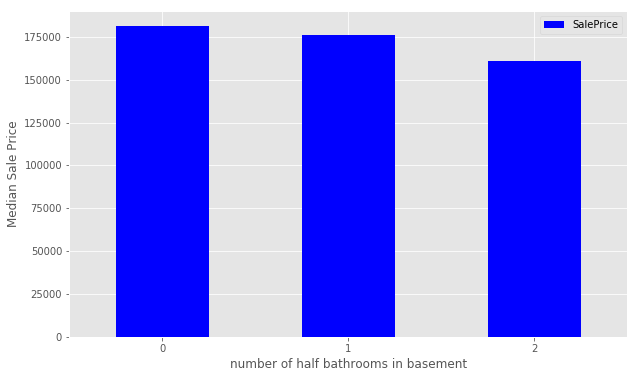

In [31]:
bshalfbath_pivot = train.pivot_table(index = 'BsmtHalfBath', values = 'SalePrice', aggfunc=np.mean)
bshalfbath_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of half bathrooms in basement')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [32]:
train.MiscVal.unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500])

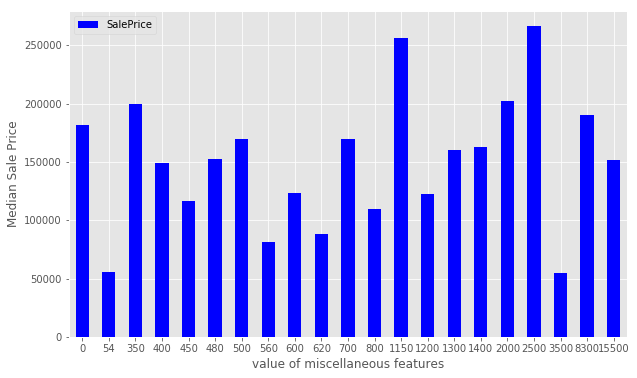

In [33]:
misvalues_pivot = train.pivot_table(index = 'MiscVal', values = 'SalePrice', aggfunc=np.mean)
misvalues_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('value of miscellaneous features')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
KitchenAbvGr

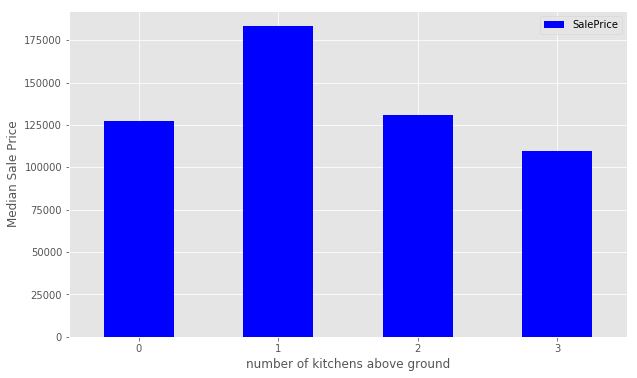

In [35]:
kitchen_pivot = train.pivot_table(index = 'KitchenAbvGr', values = 'SalePrice', aggfunc=np.mean)
kitchen_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('number of kitchens above ground')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()
#부엌은 하나면 된다. 
#이것도 encoding? 1인 경우를 1로 잡고 나머지는 0?

### Sale Condition 매매형태 

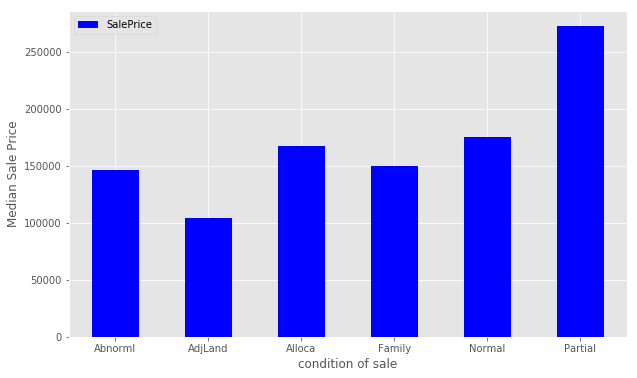

In [36]:
salecondition_pivot = train.pivot_table(index = 'SaleCondition', values = 'SalePrice', aggfunc=np.mean)
salecondition_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('condition of sale')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

partial만 독보적으로 높기 때문에 partial을 1로 잡고 나머지는 0을 부여한다. 
street경우에도 마찬가지로 이와 같이 적용한다. 

In [37]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

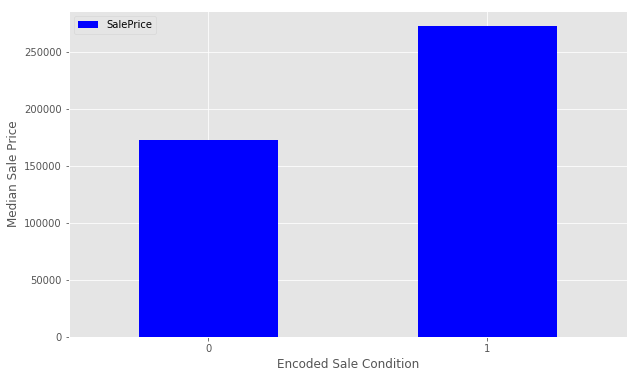

In [38]:
salecondition_pivot = train.pivot_table(index = 'enc_condition', values = 'SalePrice', aggfunc=np.mean)
salecondition_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [47]:
train.GrLivArea.unique()
GrLivArea_pivot = train.pivot_table(index='GrLivArea', values= 'SalePrice', aggfunc=np.mean)
GrLivArea_pivot.tail()

,SalePrice
GrLivArea,
3627,625000.0
4316,755000.0
4476,745000.0
4676,184750.0
5642,160000.0


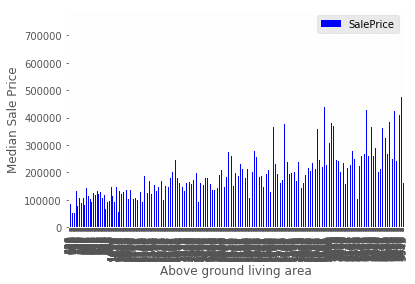

In [48]:
GrLivArea_pivot.plot(kind = 'bar', color='blue')
plt.xlabel('Above ground living area')
plt.ylabel('Median Sale Price')
plt.hist(GrLivArea_pivot, bins = 50, normed=True )
plt.show()


In [43]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns